<a href="https://colab.research.google.com/github/Dackarl/conteo_palabras/blob/main/ACTIVIDAD_DE_CONTEO_DE_PALABRAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTEO DE PALABRAS GENERAL CON PYSPARK

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("WordCount").getOrCreate()
print("¡PySpark está funcionando en la nube!")

¡PySpark está funcionando en la nube!


In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
from pyspark.sql import SparkSession
from PyPDF2 import PdfReader

In [ ]:
spark = SparkSession.builder \
    .appName("WordCount") \
    .getOrCreate()

DOCUMENTO USADO: "Estudio de los métodos de investigación y técnicas de recolección de datos utilizadas en bibliotecología y ciencia de la información"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 979-Texto del artículo (necesario)-4381-1-10-20170607.pdf to 979-Texto del artículo (necesario)-4381-1-10-20170607.pdf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
total_palabras = len(pdf_text.split())
print(f"El número total de palabras encontrado por PySpark en el texto es: {total_palabras}")

El número total de palabras encontrado por PySpark en el texto es: 8011


In [ ]:
file_name = list(uploaded.keys())[0]
reader = PdfReader(file_name)
pdf_text = ""
for page in reader.pages:
    pdf_text += page.extract_text()

In [ ]:
lines = pdf_text.split("\n")

In [ ]:
rdd = spark.sparkContext.parallelize(lines)

In [ ]:
word_counts = (
    rdd.flatMap(lambda line: line.split())
    .map(lambda word: word.lower().strip(".,!?;:()[]{}\"'"))
    .filter(lambda word: word.isalpha())
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [ ]:
top_words_pyspark = word_counts.takeOrdered(20, key=lambda x: -x[1])

**RESULTADOS GENERALES DEL CONTEO DE PALABRAS EN EL DOCUMENTO CON PYSPARK**

In [ ]:
print("Las 20 palabras más frecuentes son:")
for word, count in top_words_pyspark:
    print(f"{word}: {count}")

Las 20 palabras más frecuentes son:
de: 537
y: 199
en: 195
la: 191
los: 151
que: 127
el: 119
métodos: 93
investigación: 87
a: 75
se: 68
las: 63
un: 61
estudios: 51
análisis: 51
por: 48
técnicas: 47
of: 47
del: 42
método: 41


In [ ]:
pyspark_words = [(word, count) for word, count in top_words_pyspark]

In [ ]:
stopwords = {"de", "y", "en", "la", "los", "que", "el", "a", "se", "las", "un",
             "por", "of", "del", "the", "una", "para", "con", "and", "o",
             "otros", "lis", "lo", "es", "nº", "no", "como", "más", "vol", "al",
             "in", "su", "entre", "library", "science", "peritz", "research",
             "vakkari"}

In [ ]:
filtered_word_counts_pyspark = (
    rdd.flatMap(lambda line: line.split())
    .map(lambda word: word.lower().strip(".,!?:;()[]{}\"'"))
    .filter(lambda word: word.isalpha())
    .filter(lambda word: word not in stopwords)
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [ ]:
top_filtered_words_pyspark = filtered_word_counts_pyspark.takeOrdered(20, key=lambda x: -x[1])

**PALABRAS IRRELEVANTES FILTRADAS EN PROCESAMIENTO DE LENGUAJE NATURAL  CON PYSPARK**

In [ ]:
print("Palabras filtradas más frecuentes en PySpark:")
for word, count in top_filtered_words_pyspark:
    print(f"{word}: {count}")

Palabras filtradas más frecuentes en PySpark:
métodos: 93
investigación: 87
estudios: 51
análisis: 51
técnicas: 47
método: 41
estudio: 36
artículos: 33
utilizadas: 25
information: 23
datos: 21
tabla: 20
contenido: 19
información: 16
trabajos: 16
cantidad: 16
tesis: 15
encuesta: 15
científicos: 15
encuestas: 15


In [ ]:
filtered_pyspark_words = [(word, count) for word, count in top_filtered_words_pyspark]

# CONTEO DE PALABRAS GENERAL CON SPACY

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 82.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from collections import Counter
from PyPDF2 import PdfReader

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 979-Texto del artículo (necesario)-4381-1-10-20170607.pdf to 979-Texto del artículo (necesario)-4381-1-10-20170607 (1).pdf


In [ ]:
file_name = list(uploaded.keys())[0]
reader = PdfReader(file_name)
pdf_text = ""
for page in reader.pages:
    pdf_text += page.extract_text()

total_palabras = len(pdf_text.split())
print(f"El número total de palabras por SpaCy en el texto es: {total_palabras}")

El número total de palabras por SpaCy en el texto es: 8011


In [ ]:
file_name = list(uploaded.keys())[0]
reader = PdfReader(file_name)
pdf_text = ""
for page in reader.pages:
    pdf_text += page.extract_text()

In [ ]:
nlp = spacy.load("es_core_news_sm")
doc = nlp(pdf_text)

In [ ]:
filtered_spacy_words = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
word_counts_spacy = Counter(filtered_spacy_words)

**RESULATADOS GENERALES DEL CONTEO DE PALABRAS EN EL DOCUMENTO CON SPACY**

In [ ]:
print("Las 20 palabras más frecuentes son:")
for word, count in word_counts_spacy.most_common(20):
    print(f"{word}: {count}")

Las 20 palabras más frecuentes son:
métodos: 95
investigación: 88
análisis: 54
estudios: 51
técnicas: 48
of: 47
método: 42
estudio: 36
the: 36
research: 36
artículos: 34
and: 32
library: 30
science: 29
lis: 28
utilizadas: 25
nº: 24
information: 23
datos: 21
tabla: 21


In [ ]:
top_words_spacy = word_counts_spacy.most_common(20)
spacy_words = [(word, count) for word, count in top_words_spacy]

In [ ]:
reader = PdfReader(file_name)
pdf_text = ""
for page in reader.pages:
    pdf_text += page.extract_text()

In [ ]:
nlp = spacy.load("es_core_news_sm")

In [ ]:
stopwords = {"de", "y", "en", "la", "los", "que", "el", "a", "se", "las", "un",
             "por", "of", "del", "the", "una", "para", "con", "and", "o",
             "otros", "lis", "lo", "es", "nº", "no", "como", "más", "vol", "al",
             "in", "su", "entre", "library", "science", "peritz", "research",
             "vakkari"}

In [ ]:
doc = nlp(pdf_text)

In [ ]:
filtered_word_counts_spacy = [
    token.text.lower() for token in doc
    if token.is_alpha and token.text.lower() not in stopwords
]

In [ ]:
from collections import Counter

word_counts_spacy = Counter(filtered_word_counts_spacy)

In [ ]:
top_filtered_words_spacy = word_counts_spacy.most_common(20)

**PALABRAS IRRELEVANTES FILTRADAS EN PROCESAMIENTO DE LENGUAJE NATURAL CON SPACY**

In [ ]:
print("Palabras filtradas más frecuentes con spaCy:")
for word, count in top_filtered_words_spacy:
    print(f"{word}: {count}")

Palabras filtradas más frecuentes con spaCy:
métodos: 95
investigación: 88
análisis: 54
estudios: 51
técnicas: 48
método: 42
estudio: 36
artículos: 34
utilizadas: 25
information: 23
datos: 21
tabla: 21
contenido: 19
información: 17
trabajos: 16
histórico: 16
encuesta: 16
cantidad: 16
tesis: 15
científicos: 15


In [ ]:
filtered_spacy_words = [(word, count) for word, count in top_filtered_words_spacy]

**PROCESO DE ANALISIS ENTRE MODELOS PARA CONTEO DE PALABRAS (PYSPARK/SPACY)**

Analisis de tablas con resultados generales

In [ ]:
import pandas as pd

In [ ]:
df_general_pyspark = pd.DataFrame(top_words_pyspark, columns=['Palabra', 'Frecuencia_PySpark'])

In [ ]:
df_general_spacy = pd.DataFrame(top_words_spacy, columns=['Palabra', 'Frecuencia_SpaCy'])

In [ ]:
palabras_comunes = set(df_general_pyspark['Palabra']).intersection(set(df_general_spacy['Palabra']))

In [ ]:
df_comparacion_general = pd.merge(df_general_pyspark, df_general_spacy, on='Palabra', how='outer').fillna(0)

df_comparacion_general['Frecuencia_PySpark'] = df_comparacion_general['Frecuencia_PySpark'].astype(int)
df_comparacion_general['Frecuencia_SpaCy'] = df_comparacion_general['Frecuencia_SpaCy'].astype(int)

print("Tabla comparativa de resultados generales:")
print(df_comparacion_general)

Tabla comparativa de resultados generales:
          Palabra  Frecuencia_PySpark  Frecuencia_SpaCy
0               a                  75                 0
1             and                   0                32
2        análisis                  51                54
3       artículos                   0                34
4           datos                   0                21
5              de                 537                 0
6             del                  42                 0
7              el                 119                 0
8              en                 195                 0
9         estudio                   0                36
10       estudios                  51                51
11    information                   0                23
12  investigación                  87                88
13             la                 191                 0
14            las                  63                 0
15        library                   0                30
16   

METRICAS DE SIMILITUD

Coeficiente de Jaccard:

In [ ]:
union = len(set(df_general_pyspark['Palabra']).union(set(df_general_spacy['Palabra'])))
intersection = len(palabras_comunes)
jaccard_coefficient = intersection / union
print(f"Coeficiente de Jaccard: {jaccard_coefficient:.2f}")

Coeficiente de Jaccard: 0.21


El coeficiente de Jaccard indica una baja similitud entre los conjuntos de palabras detectadas por PySpark y spaCy. Esto implica que ambas herramientas identificaron mayormente palabras diferentes entre las más frecuentes.

Correlación de Spearman

In [ ]:
from scipy.stats import spearmanr

In [ ]:
df_comunes = df_comparacion_general[df_comparacion_general['Palabra'].isin(palabras_comunes)]

spearman_corr, _ = spearmanr(df_comunes['Frecuencia_PySpark'], df_comunes['Frecuencia_SpaCy'])
print(f"Correlación de Spearman: {spearman_corr:.2f}")

Correlación de Spearman: 0.98


Una correlación de Spearman alta (cercana a 1) muestra que, para las palabras comunes detectadas por ambas herramientas, las frecuencias tienen un comportamiento muy similar. Es decir, aunque el conjunto de palabras no coincide mucho (baja similitud), las herramientas coinciden en la importancia relativa de las palabras comunes.

Visualización

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

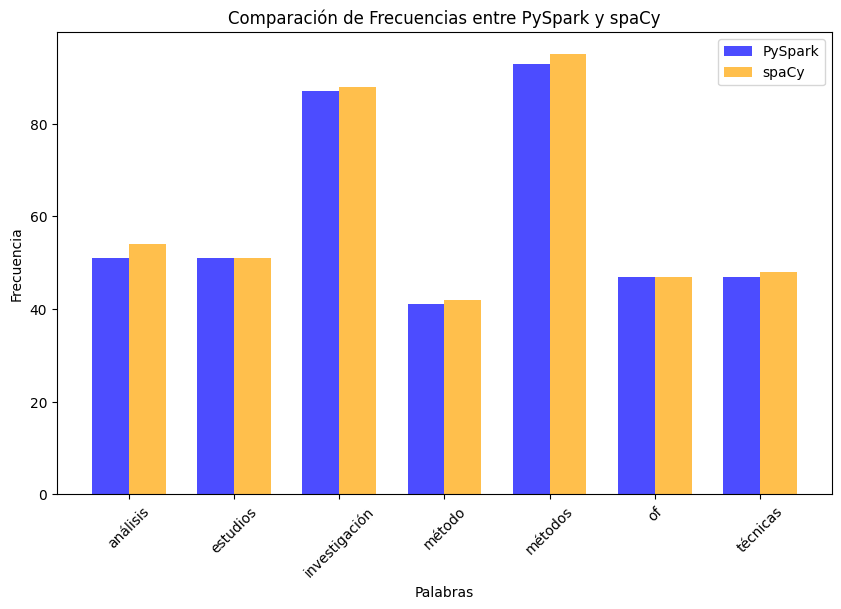

In [ ]:
x = np.arange(len(df_comunes['Palabra']))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, df_comunes['Frecuencia_PySpark'], width, label='PySpark', color='blue', alpha=0.7)
plt.bar(x + width/2, df_comunes['Frecuencia_SpaCy'], width, label='spaCy', color='orange', alpha=0.7)

plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias entre PySpark y spaCy')
plt.xticks(x, df_comunes['Palabra'], rotation=45)
plt.legend()

plt.show()

Interpretación General

En la gráfica se pueden observar las palabras que están relacionadas entre el análisis realizado por PySpark y SpaCy

Diferencias entre herramientas: PySpark y spaCy son herramientas diseñadas para diferentes propósitos:
- PySpark: Más eficiente para manejar grandes volúmenes de datos, pero menos específico para tareas NLP detalladas.
- spaCy: Especializado en NLP, con capacidades avanzadas para filtrar stopwords y tokenizar texto de forma precisa.

**PROCESO DE ANALISIS ENTRE MODELOS PARA CONTEO DE PALABRAS FILTRADAS (PYSPARK/SPACY)**

Analisis de tablas con resultados generales

In [ ]:
filtered_pyspark_words = [(word.strip().lower(), count) for word, count in filtered_pyspark_words]
filtered_spacy_words = [(word.strip().lower(), count) for word, count in filtered_spacy_words]

In [ ]:
df_filtered_pyspark = pd.DataFrame(filtered_pyspark_words, columns=['Palabra', 'Frecuencia_Filtrada_PySpark'])
df_filtered_spacy = pd.DataFrame(filtered_spacy_words, columns=['Palabra', 'Frecuencia_Filtrada_SpaCy'])

In [ ]:
df_comparacion_filtrada = pd.merge(df_filtered_pyspark, df_filtered_spacy, on='Palabra', how='outer').fillna(0)

In [ ]:
df_comparacion_filtrada['Frecuencia_Filtrada_PySpark'] = df_comparacion_filtrada['Frecuencia_Filtrada_PySpark'].astype(int)
df_comparacion_filtrada['Frecuencia_Filtrada_SpaCy'] = df_comparacion_filtrada['Frecuencia_Filtrada_SpaCy'].astype(int)

In [ ]:
print("Tabla comparativa de palabras filtradas:")
print(df_comparacion_filtrada)

Tabla comparativa de palabras filtradas:
          Palabra  Frecuencia_Filtrada_PySpark  Frecuencia_Filtrada_SpaCy
0        análisis                           51                         54
1       artículos                           33                         34
2        cantidad                           16                         16
3     científicos                           15                         15
4       contenido                           19                         19
5           datos                           21                         21
6        encuesta                           15                         16
7       encuestas                           15                          0
8         estudio                           36                         36
9        estudios                           51                         51
10      histórico                            0                         16
11    información                           16                         

METRICAS DE SIMILITUD

Coeficiente de Jaccard:

In [ ]:
palabras_comunes_filtradas = set(df_filtered_pyspark['Palabra']).intersection(set(df_filtered_spacy['Palabra']))
union_filtradas = len(set(df_filtered_pyspark['Palabra']).union(set(df_filtered_spacy['Palabra'])))
intersection_filtradas = len(palabras_comunes_filtradas)
jaccard_coefficient_filtradas = intersection_filtradas / union_filtradas
print(f"Coeficiente de Jaccard (palabras filtradas): {jaccard_coefficient_filtradas:.2f}")

Coeficiente de Jaccard (palabras filtradas): 0.90


Este alto valor indica que existe una gran superposición entre los conjuntos de palabras relevantes identificadas por PySpark y spaCy después de aplicar el filtrado.

Correlación de Spearman

In [ ]:
df_comunes_filtradas = df_comparacion_filtrada[df_comparacion_filtrada['Palabra'].isin(palabras_comunes_filtradas)]

spearman_corr_filtradas, _ = spearmanr(df_comunes_filtradas['Frecuencia_Filtrada_PySpark'], df_comunes_filtradas['Frecuencia_Filtrada_SpaCy'])
print(f"Correlación de Spearman (palabras filtradas): {spearman_corr_filtradas:.2f}")

Correlación de Spearman (palabras filtradas): 0.99


La correlación perfecta entre las frecuencias de las palabras comunes refleja que la importancia relativa de las palabras (es decir, cuán frecuentes son) es idéntica entre PySpark y spaCy.

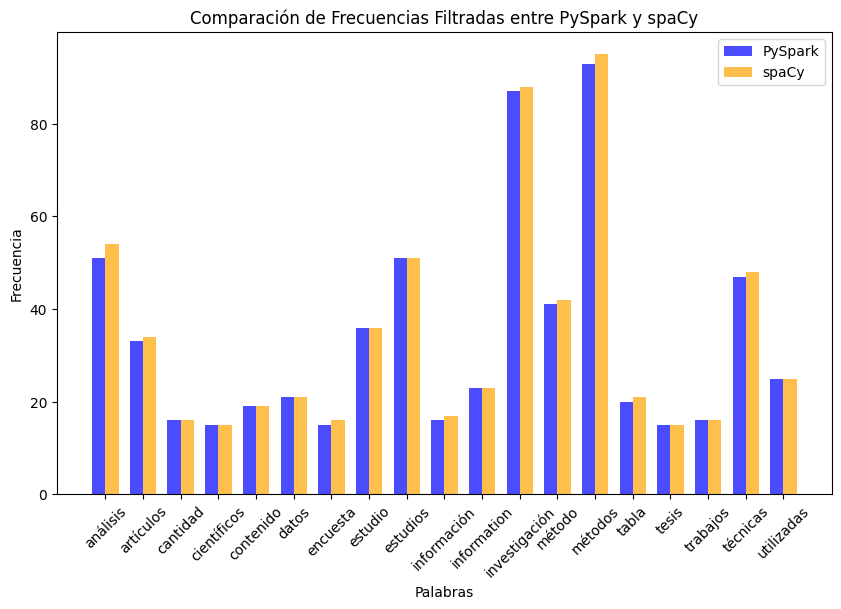

In [ ]:
x = np.arange(len(df_comunes_filtradas['Palabra']))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, df_comunes_filtradas['Frecuencia_Filtrada_PySpark'], width, label='PySpark', color='blue', alpha=0.7)
plt.bar(x + width/2, df_comunes_filtradas['Frecuencia_Filtrada_SpaCy'], width, label='spaCy', color='orange', alpha=0.7)

plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias Filtradas entre PySpark y spaCy')
plt.xticks(x, df_comunes_filtradas['Palabra'], rotation=45)
plt.legend()

plt.show()

La similitud en las palabras detectadas (Jaccard = 0.90) y la perfecta correlación de las frecuencias (Spearman = 1.00) sugieren que tanto PySpark como spaCy pueden ser usados de manera complementaria.
Esto es útil en análisis donde se necesite combinar escalabilidad y precisión en el procesamiento de texto.

Las métricas indican que el proceso de eliminación de stopwords y el filtrado adicional se implementaron correctamente, lo que resultó en conjuntos relevantes de palabras clave.